## Simple convex QSS problem

In [ ]:
import cvxpy as cvx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from gfosd import Problem
from gfosd.components import *

## Data generation

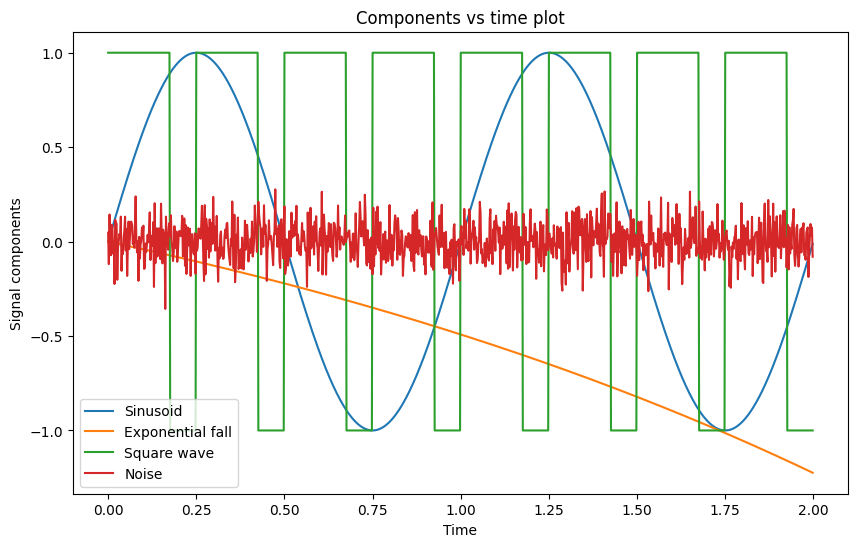

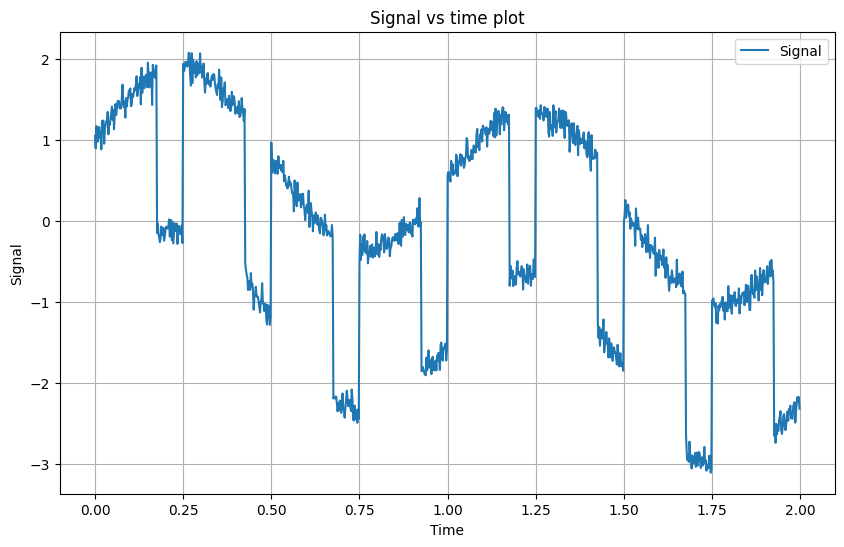

In [ ]:
a1 = 1
a2 = 1
a3 = 1
sigma = 0.1

f_1 = 1
f_2 = 5
f_sq = 4
alpha = 0.4

N = 1000
t = np.linspace(0,2,N+1)
t = t[:-1]
ts = t[1]-t[0]
fs = 1/ts

x1 = a1*np.sin(2*np.pi*f_1*t)
x2 = a2*(1-np.exp(alpha*t))
x3 = a3*sp.signal.square(2*np.pi*f_sq*t, duty=0.7)
noise = sigma*np.random.randn(N)

x = np.zeros([4,N])
x[0,:] = noise
x[1,:] = x1
x[2,:] = x2
x[3,:] = x3

y = np.sum(x, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(t, x1, label='Sinusoid')
plt.plot(t, x2, label='Exponential fall')
plt.plot(t, x3, label='Square wave')
plt.plot(t, noise, label='Noise')
plt.xlabel('Time')
plt.ylabel('Signal components')
plt.title('Components vs time plot')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, y, label='Signal')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Signal vs time plot')
plt.legend()
plt.grid()
plt.show()

## Objective functions and constraints

---------------------------------------------------------------
              QSS: the Quadratic-Separable Solver              
                     author: Luke Volpatti                     
---------------------------------------------------------------
initial factorization time:      5.95e-03s
(standard algorithm)

                           ADMM solve                          
---------------------------------------------------------------
 iter | objective | primal res | dual res |   rho   | time (s) 
---------------------------------------------------------------
    1 | 5.83e-01    1.11e+00     1.15e-01   [0.1 0.1 0.1]  9.98e-04
   25 | 1.13e-01    1.98e-03     7.83e-04   [0.1 0.1 0.1]  2.79e-02
   50 | 4.93e-02    5.13e-03     1.56e-03   [1.e-01 1.e-01 1.e-06]  6.48e-02
   75 | 4.29e-02    6.79e-04     2.83e-04   [1.e-01 1.e-01 1.e-06]  9.67e-02
  100 | 4.22e-02    3.21e-04     1.82e-04   [1.e-01 1.e-01 1.e-06]  1.24e-01
  125 | 4.16e-02    2.60e-04     1.46e-04   [1.e-01 1.e-

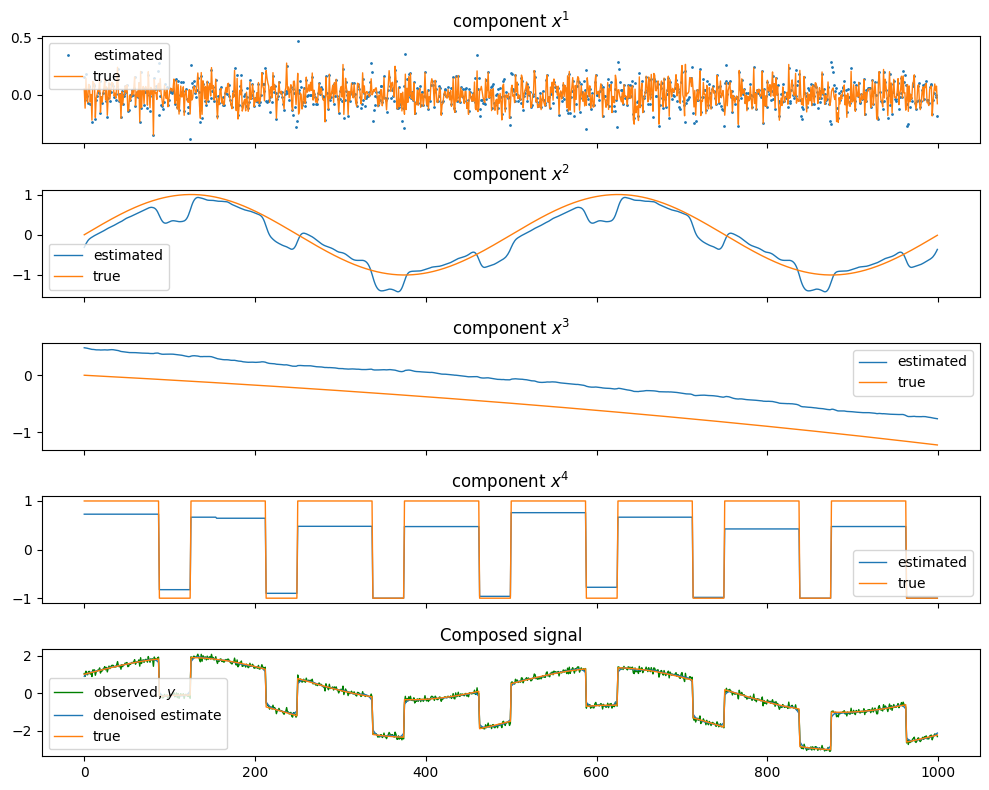

In [ ]:
T = N
c0 = SumSquare(weight=1/T)
c1 = Aggregate([
    SumSquare(weight=75/T, diff=2),
    Periodic(T=T, period=np.round(fs/f_1))
])
c2 = Aggregate([
    SumSquare(weight=75/T, diff=1),
])
c3 = Aggregate([
    SumAbs(weight=1/T, diff=1),
    Inequality(vmax=a3, vmin=-a3),
])

components = [c0, c1, c2, c3]
problem = Problem(y, components)

problem.decompose(verbose=True)
print('\nobjective value: {:.4e}'.format(problem.objective_value))
problem.plot_decomposition(X_real=x);

In [ ]:
start = time.time()
prob.decompose(verbose=False, precond=True, adaptive_rho=False)
time.time() - start